PART1 (10marks)


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/advertising.csv')
df

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


<function matplotlib.pyplot.show(*args, **kw)>

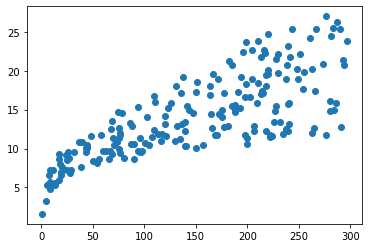

In [6]:
#1
plt.scatter(data = df,x = 'TV',y = 'Sales')
plt.show

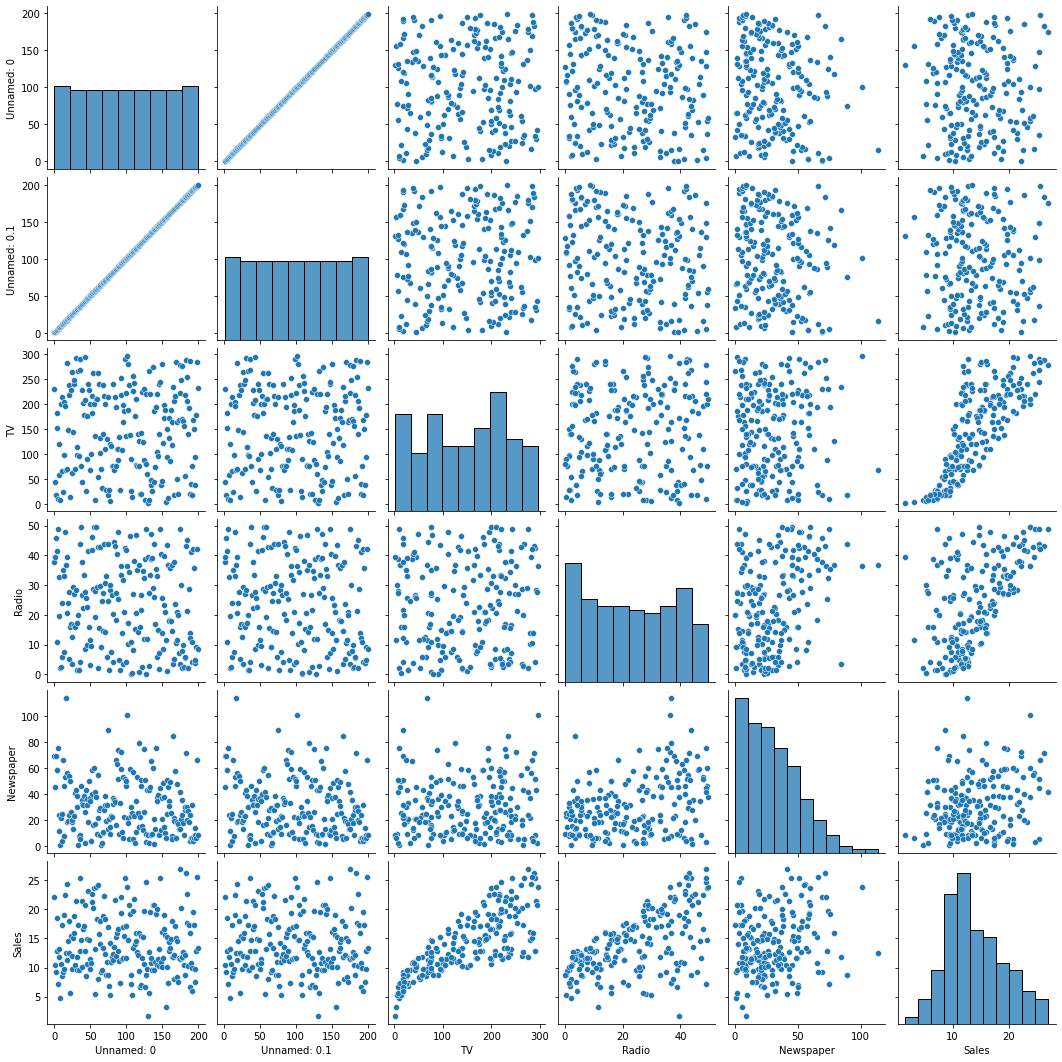

In [40]:
sns.pairplot(df)

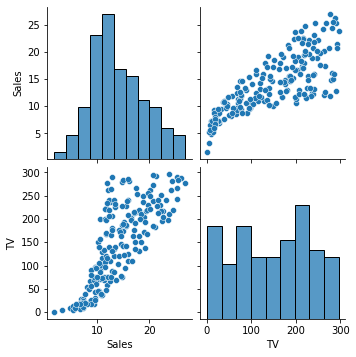

In [12]:
sns.pairplot(df[['Sales','TV']])

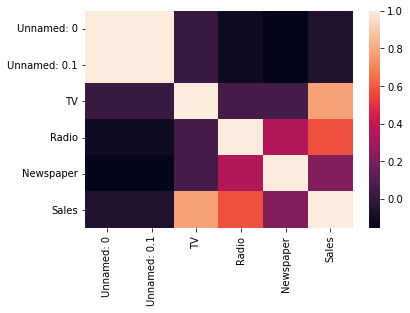

In [10]:
sns.heatmap(df.corr())

In [41]:
#2
from sklearn.model_selection import train_test_split
y = df["Sales"]
X = df[["TV"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [43]:
lm.intercept_

7.119638430592953

In [44]:
#3
y_pred = lm.predict(X_test)
y_pred

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

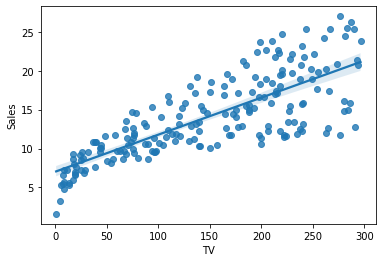

In [45]:
#4
sns.regplot(data=df,x="TV",y="Sales")

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


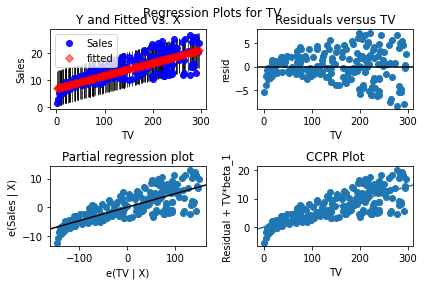

In [53]:
#5
import statsmodels.api as sm
X = sm.add_constant(df[["TV"]])
model = sm.OLS(df["Sales"], X).fit()
sm.graphics.plot_regress_exog(model, "TV")
plt.show()

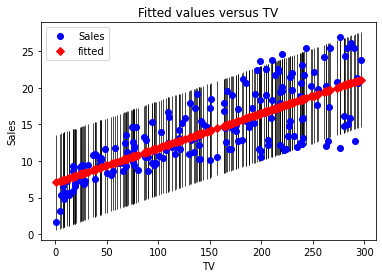

In [47]:
sm.graphics.plot_fit(model, "TV")
plt.show()

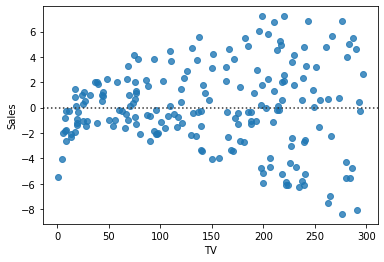

In [49]:
sns.residplot(x='TV', y='Sales', data=df)
plt.show()

In the above graphs we can observe that the points are all over the place which says that the variance is no constant. Hence, hetroscedasticity is present

PART2 (10marks)

In [70]:
#1
df2 = pd.read_csv('/content/EDITED.csv')
df2

,P,Q,R,S,T,U,V,W,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [71]:
df2.describe()

,P,Q,R,S,T,U,V,W,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
y = df2.pop('Class')
X = df2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [76]:
#2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [77]:
columns = df2.columns

In [78]:
for i in columns:
    df2[i] = scaler.fit_transform(df2[[i]])
df2

,P,Q,R,S,T,U,V,W
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [74]:
#3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [75]:
#4
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[87, 16],
       [21, 30]])

In [79]:
#5
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

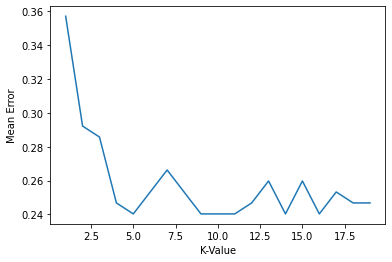

In [81]:
plt.plot(range(1, 20), error)
plt.xlabel('K-Value')
plt.ylabel('Mean Error')

based on graph at which point the mean error is high or given k value, we can observe that the error is high for k value less than 2.5